# Redes neuronales - PyTorch


In [10]:
import torch
# Base class for all neural network modules.
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


## Modelo

In [11]:
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size):
        super(FullyConnectedNN, self).__init__()
        #Defino las capas que voy a utilizar en mi modulo.
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size[0]*input_size[1], 128) # Input size: 28*28, Output Size: 128
        self.relu = nn.ReLU() # Activation Function!!! 
        self.fc2 = nn.Linear(self.fc1.out_features, 64) #Input Size: 128, Output Size: 64
        self.fc3 = nn.Linear(self.fc2.out_features, 10) #Input size: 64, Output Size: 10 (Clases de MNIST)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

## Hyper-parameters

In [12]:
# Define training parameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

## Download dataset

In [13]:
# Download and load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# Data loader. Combines a dataset and a sampler, and provides an iterable over
# the given dataset.
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
# Data loader. Combines a dataset and a sampler, and provides an iterable over
# the given dataset.
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


## Initialize Model

In [14]:
# Initialize the model, loss function, and optimizer
model = FullyConnectedNN(input_size=(28, 28))

# Print the parameters of the model
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


Layer: fc1.weight | Size: torch.Size([128, 784]) | Values : tensor([[-0.0126,  0.0086,  0.0140,  ..., -0.0081,  0.0127, -0.0089],
        [-0.0136,  0.0137, -0.0093,  ..., -0.0158,  0.0049,  0.0354]],
       grad_fn=<SliceBackward0>)
Layer: fc1.bias | Size: torch.Size([128]) | Values : tensor([-0.0126, -0.0357], grad_fn=<SliceBackward0>)
Layer: fc2.weight | Size: torch.Size([64, 128]) | Values : tensor([[-3.4736e-02, -3.4618e-02,  7.4928e-02,  8.5341e-02, -2.4439e-02,
         -1.4572e-02, -5.4904e-02, -7.5965e-03,  1.2583e-02,  8.0260e-02,
         -8.7002e-03, -7.8088e-02,  8.3025e-02,  3.8864e-02,  2.9282e-02,
         -8.9568e-03, -2.0643e-02, -6.4351e-02,  4.1175e-02, -6.4428e-02,
         -1.9222e-02, -4.3148e-02,  6.6711e-02,  6.1394e-02,  4.7945e-02,
          6.2842e-02, -6.1744e-02, -2.2879e-02,  1.1517e-02,  2.1212e-02,
         -6.3188e-02, -1.9772e-02,  7.2566e-02,  6.5539e-02, -8.3213e-04,
          7.6689e-02,  2.9882e-02,  7.9124e-02,  2.3328e-02, -2.3418e-02,
         

In [17]:

# Lists to store training and validation losses
train_losses = []
test_losses = []
# Training loop
for epoch in range(num_epochs):
    model.eval()  
    test_loss = 0.0
    correct = 0
    total = 0
    # No es necesario calcular gradientes
    with torch.no_grad():
        for batch_idx, (data, targets) in enumerate(test_loader):
            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    accuracy = correct / total
    test_losses.append(avg_test_loss)
    model.train()  # Set model to training mode
    train_loss = 0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Coloca el gradiente del optimizador en zero
        # Calcula las derivadas parciales (gradientes) de cada parametro a optimizar
        # Finalmente hace la actualización de parametros.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    train_losses.append(train_loss / len(train_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2%}')


Epoch [1/10], Step [1/938], Loss: 0.0486
Epoch [1/10], Step [101/938], Loss: 0.1272
Epoch [1/10], Step [201/938], Loss: 0.0307
Epoch [1/10], Step [301/938], Loss: 0.0771
Epoch [1/10], Step [401/938], Loss: 0.0528
Epoch [1/10], Step [501/938], Loss: 0.1117
Epoch [1/10], Step [601/938], Loss: 0.0320
Epoch [1/10], Step [701/938], Loss: 0.0468
Epoch [1/10], Step [801/938], Loss: 0.4075
Epoch [1/10], Step [901/938], Loss: 0.0940
Epoch [1/10], Train Loss: 0.0528, Test Loss: 0.1002, Accuracy: 97.20%
Epoch [2/10], Step [1/938], Loss: 0.0228
Epoch [2/10], Step [101/938], Loss: 0.0342
Epoch [2/10], Step [201/938], Loss: 0.0661
Epoch [2/10], Step [301/938], Loss: 0.0272
Epoch [2/10], Step [401/938], Loss: 0.0810
Epoch [2/10], Step [501/938], Loss: 0.0533
Epoch [2/10], Step [601/938], Loss: 0.0304
Epoch [2/10], Step [701/938], Loss: 0.0179
Epoch [2/10], Step [801/938], Loss: 0.1817
Epoch [2/10], Step [901/938], Loss: 0.0969
Epoch [2/10], Train Loss: 0.0476, Test Loss: 0.1007, Accuracy: 96.90%
Epoc

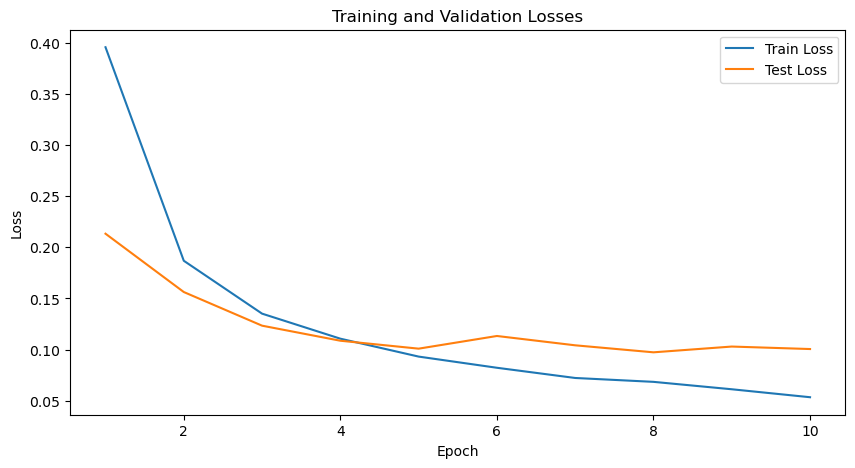

Training finished!


In [16]:

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

print('Training finished!')

In [18]:
# Save model state
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, 'model_checkpoint.pth')

In [26]:
model = FullyConnectedNN(input_size=(28, 28))
model.eval()  
test_loss = 0.0
correct = 0
total = 0
# No es necesario calcular gradientes
with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

avg_test_loss = test_loss / len(test_loader)
accuracy = correct / total
print(f"Accuracy: {accuracy}")

Accuracy: 0.132


In [27]:
# Load saved model parameters
checkpoint = torch.load('model_checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [28]:
model.eval()  
test_loss = 0.0
correct = 0
total = 0
# No es necesario calcular gradientes
with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

avg_test_loss = test_loss / len(test_loader)
accuracy = correct / total
print(f"Accuracy: {accuracy}")

Accuracy: 0.9717
